In [5]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # module for missing value visualization

# Pretty display for notebooks
%matplotlib inline


* [Step 0](#step0): Import Dataset.
* [Step 1](#step1): Have a look at the columns in dataset first. 
    - [Step 11](#step11)convert datetime columns
* [Step 2](#step2): Plot distribution on `Reviewer_Score`, `Total_Number_of_Reviews_Reviewer_Has_Given`, `Review_Total_Negative_Word_Counts`, `Review_Total_Positive_Word_Counts`
* [Step 3](#step3): Drop out duplicates on `Total_Number_of_Reviews` and `Average_Score`
    - [Step 31](#step31): plot distribution for Total_Number_of_Reviews and Average_Score 


<a id="step0"></a>
### Step 0: Import Dataset

In [2]:
dataset = pd.read_csv("./Hotel_Reviews.csv")

<a id="step1"></a>
### Step1: Explorative Data Analysis
Have a look at the whole dataset first.

In [66]:
display(dataset.head(n=2))

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

<a id="step11"></a>
#### Convert the column `Review_Date` to **datetime** data type.
As we can tell, the `Review_date` is an object type, we need to convert it into datetime.

In [3]:
dataset.Review_Date = pd.to_datetime(dataset.Review_Date, format="%m/%d/%Y")

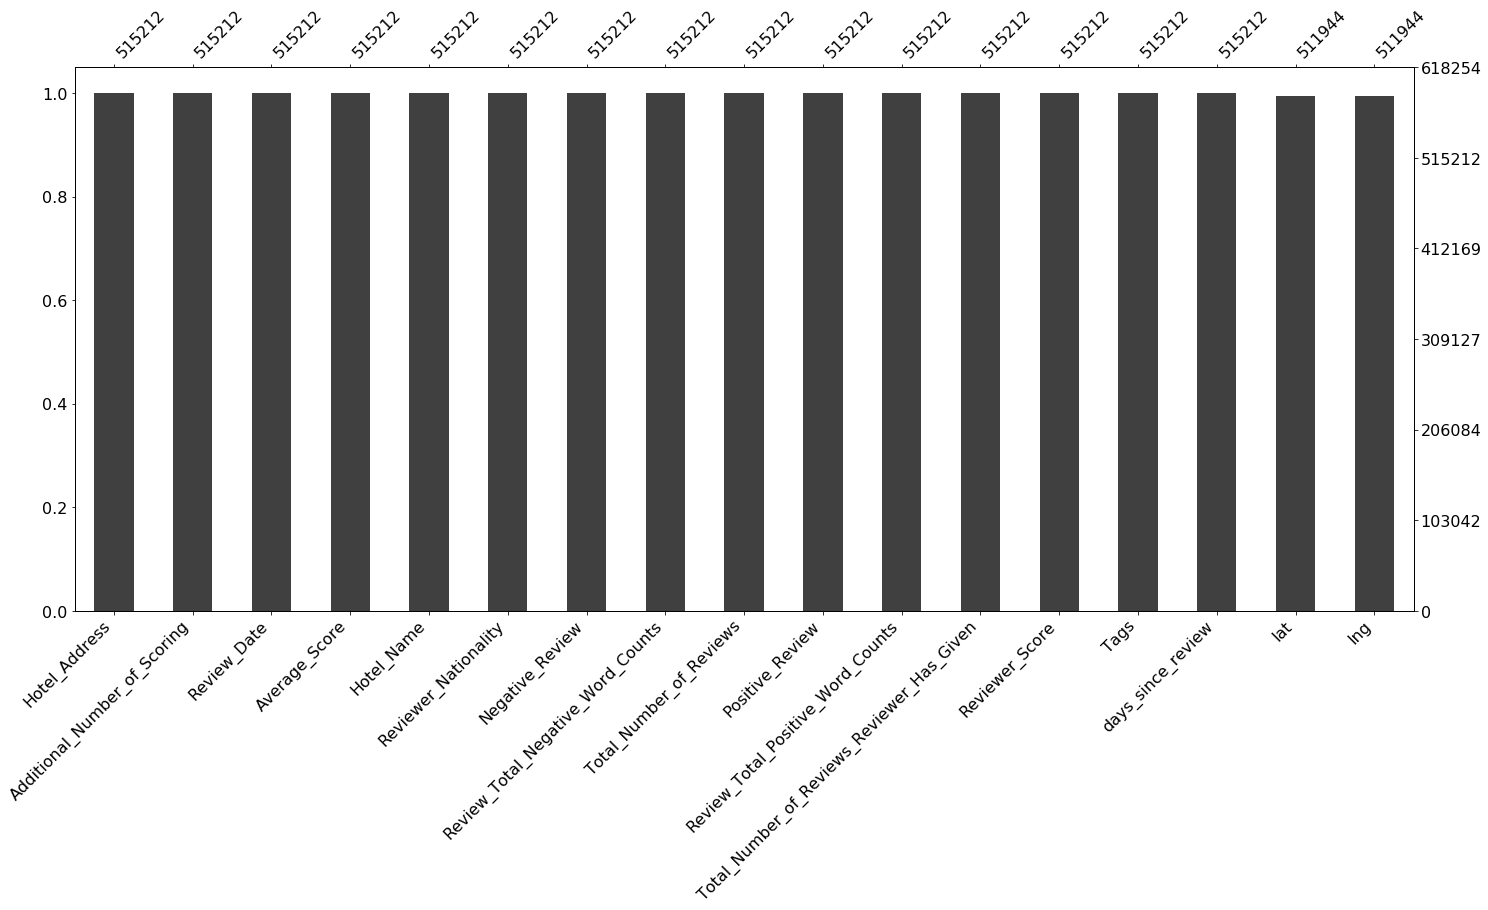

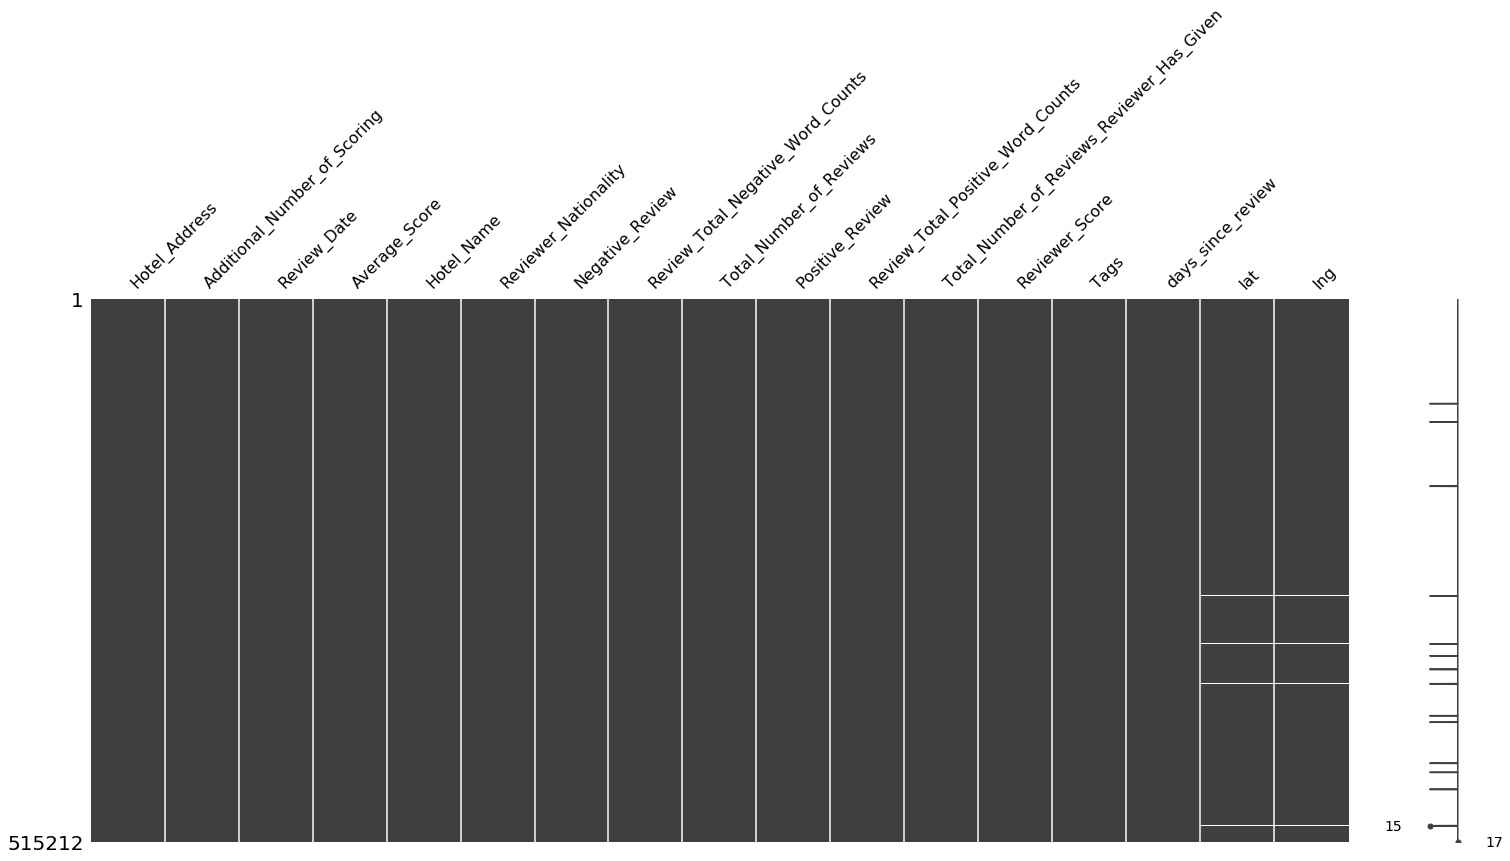

In [18]:
# visualization of the missing values
msno.bar(dataset) # show up the percentage of missing values in each column
msno.matrix(dataset) # show up the distribution of missing values in each row

In [35]:
# calculate how many missing rows
missing_rows = dataset[dataset.isnull().any(axis=1)]
display(missing_rows.head(n=2))
display("Shape of missing rows: {}".format(missing_rows.shape))

# another brief code version
dataset.isnull().any().sum()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
99488,20 Rue De La Ga t 14th arr 75014 Paris France,22,2017-08-03,7.8,Mercure Paris Gare Montparnasse,Australia,No Negative,0,377,Upgraded rooms are excellent Good size for tr...,25,6,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99489,20 Rue De La Ga t 14th arr 75014 Paris France,22,2017-08-03,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Noise Not being told about this when we check...,12,377,The location was great However renovations we...,45,1,6.7,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN


'Shape of missing rows: (3268, 17)'

#### We can tell that missing values exist in `lat` and `lng` columns.
For there are only 3268 records contain missing value, it's relatively small portion to the whole dataset. I will just drop them all.

In [5]:
# drop out all missing rows
dataset = dataset[~dataset.isnull().any(axis=1)]

# Check up again
dataset.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [68]:
display(dataset.describe())

# it will list all the descriptive summary for both categorical and numerical features.
#dataset.describe(include="all")

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


<a id="step2"></a>
#### Step2: Plot distribution on `Reviewer_Score`, `Total_Number_of_Reviews_Reviewer_Has_Given`, `Review_Total_Negative_Word_Counts`, `Review_Total_Positive_Word_Counts` 

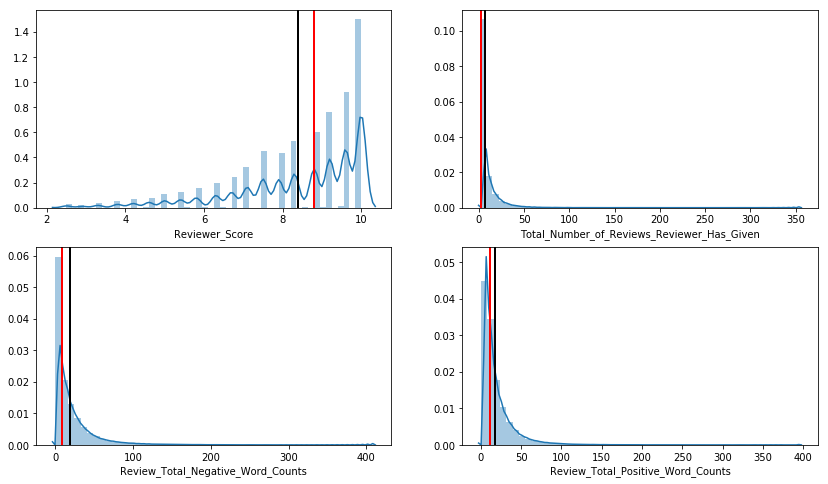

In [121]:
# plot distribution
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
fig.set_size_inches(14,8)

columns = ["Reviewer_Score", "Total_Number_of_Reviews_Reviewer_Has_Given", \
           "Review_Total_Negative_Word_Counts", "Review_Total_Positive_Word_Counts"]

for i, col in enumerate(columns):
    feature = dataset[col]
    feature.dropna(inplace=True)
    sns.distplot(feature, label = col, ax = axes[i])
    axes[i].axvline(feature.mean(), linewidth=2, color="black")
    axes[i].axvline(feature.median(), linewidth=2, color="red")


<a id="step3"></a> 
#### Step3: Drop out duplicates on `Total_Number_of_Reviews` and `Average_Score`
First drop out all the duplicate values in `Total_Number_of_Reviews` and `Hotel_Name`

In [4]:
# drop duplicates on Total_Number_of_Reviews for each hotel
tol_num_review = dataset[["Total_Number_of_Reviews","Hotel_Name"]]
tol_num_review.set_index("Hotel_Name", inplace=True)
tol_num_review.drop_duplicates(inplace=True)

display(tol_num_review[:3])

# drop duplicates on Average_Score for each hotel
average_score = dataset[["Average_Score","Hotel_Name"]]
average_score.set_index("Hotel_Name", inplace=True)
average_score.drop_duplicates(inplace=True)
display(average_score[:3])


/Users/TomLin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Total_Number_of_Reviews
Hotel_Name,
Hotel Arena,1403
K K Hotel George,1831
Apex Temple Court Hotel,2619


/Users/TomLin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Average_Score
Hotel_Name,
Hotel Arena,7.7
K K Hotel George,8.5
Apex Temple Court Hotel,9.2


<a id="step31"></a>
#### Step 31: plot distribution for Total_Number_of_Reviews and Average_Score

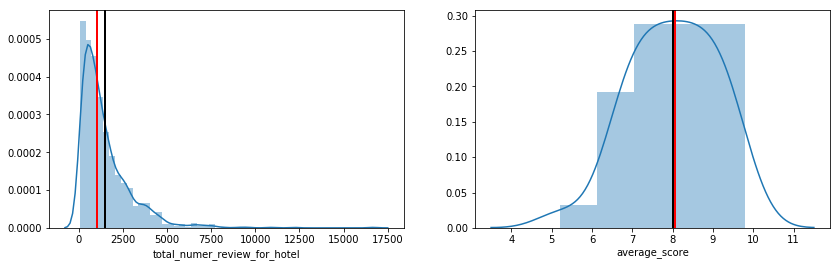

In [125]:
# plot distribution for Total_Number_of_Reviews and Average_Score
fig, axes = plt.subplots(1, 2)
axes = axes.flatten()
fig.set_size_inches(14,4)

sns.distplot(tol_num_review, axlabel = "total_numer_review_for_hotel", ax = axes[0])
axes[0].axvline(tol_num_review.mean()[0], linewidth=2, color="black")
axes[0].axvline(tol_num_review.median()[0], linewidth=2, color="red")

sns.distplot(average_score, axlabel = "average_score", ax = axes[1])
axes[1].axvline(average_score.mean()[0], linewidth=2, color="black")
axes[1].axvline(average_score.median()[0], linewidth=2, color="red")


[Text(0,0,u' United Kingdom '),
 Text(0,0,u' United States of America '),
 Text(0,0,u' Australia '),
 Text(0,0,u' Ireland '),
 Text(0,0,u' United Arab Emirates '),
 Text(0,0,u' Saudi Arabia '),
 Text(0,0,u' Netherlands '),
 Text(0,0,u' Switzerland '),
 Text(0,0,u' Germany '),
 Text(0,0,u' Canada '),
 Text(0,0,u' France '),
 Text(0,0,u' Israel '),
 Text(0,0,u' Italy '),
 Text(0,0,u' Belgium '),
 Text(0,0,u' Turkey '),
 Text(0,0,u' Kuwait '),
 Text(0,0,u' Spain '),
 Text(0,0,u' Romania '),
 Text(0,0,u' Russia '),
 Text(0,0,u' South Africa '),
 Text(0,0,u'others')]

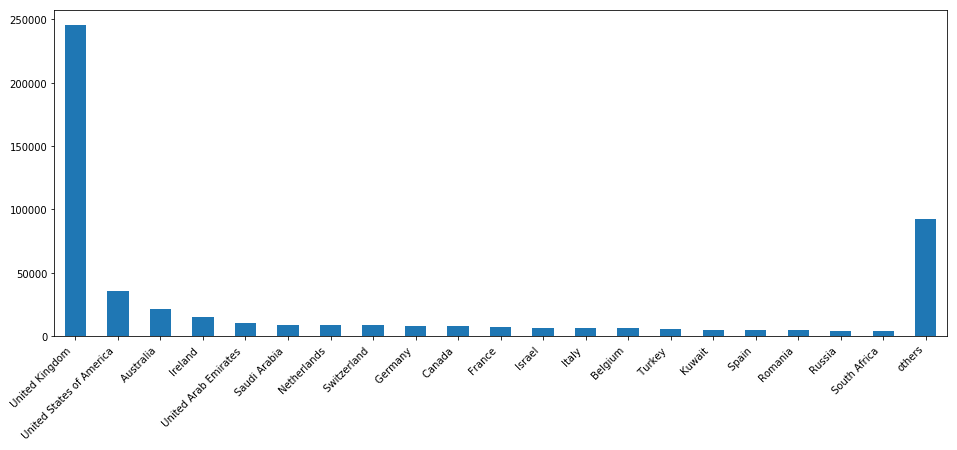

In [80]:
top_20 = dataset.Reviewer_Nationality.value_counts()[:20]
other_countries = pd.Series(int(dataset.Reviewer_Nationality.value_counts()[20:].sum()), index = ["others"])
new = pd.concat([top_20, other_countries])
g = new.plot(kind="bar", figsize=(16,6))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Remove duplicated records

In [14]:
# Before removing the duplicated records
print("Before removing duplicated records, the shape of dataset: {}".format(dataset.shape))


Before removing duplicated records, the shape of dataset: (515738, 17)


In [4]:
# After removing the duplicated records
dataset.drop_duplicates(inplace=True)
print("After removing duplicated records, the shape of dataset: {}".format(dataset.shape))

After removing duplicated records, the shape of dataset: (515212, 17)


['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'lat',
 'lng']

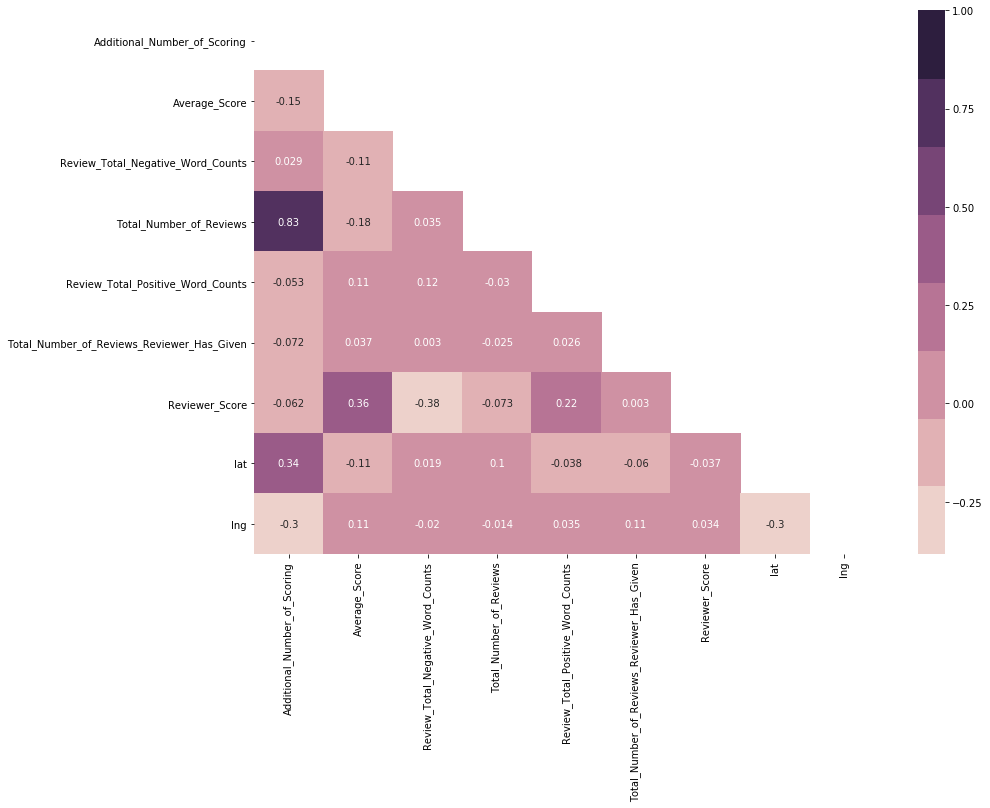

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter out numeric columns
numeric_cols = []
for col in dataset.columns:
    if (dataset[col].dtypes == np.float64) or (dataset[col].dtypes == np.int64):
        numeric_cols.append(col)

display(numeric_cols)

# plot the correlation diagram

plt.figure(figsize=(14,10))

corr = dataset[numeric_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# function will detect and neglect the categorical features
sns.heatmap(dataset.corr(), cmap = sns.cubehelix_palette(8), annot = True, mask = mask) 

#### It seems like only `Total_Number_of_Reviews` and `Additional_Number_of_Scoring` has higher correlation.
The other minor one is `Reviewer_Score` and `Average_Score`. These seems to be quite reasonable. Others reveal  only very small correlations. 

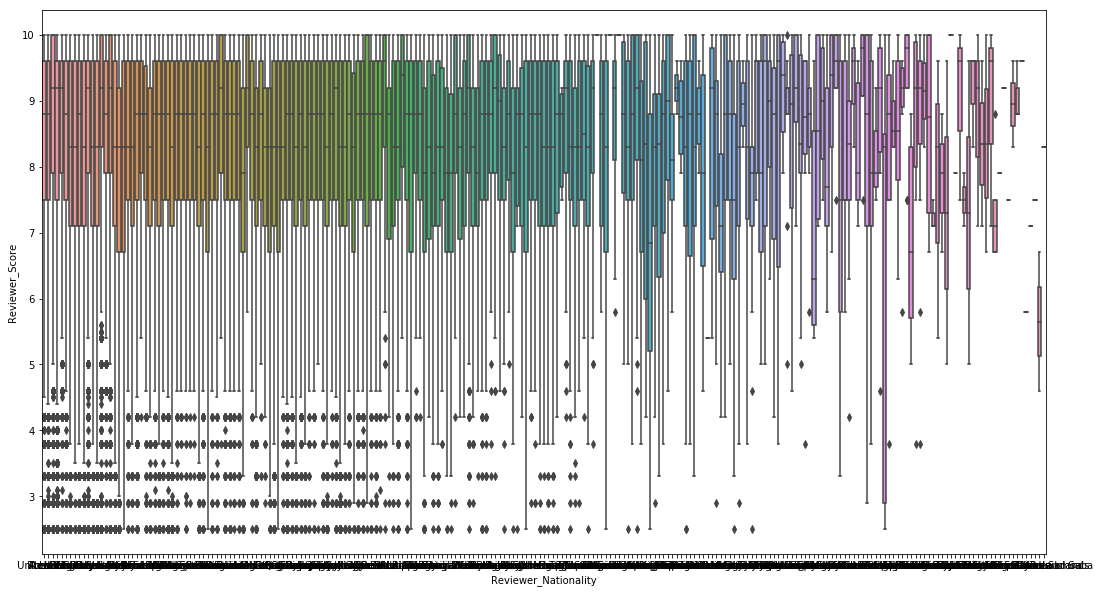

In [70]:
# boxplot on score distribution based on nationality
plt.figure(figsize=(18,10))
sns.boxplot(x = "Reviewer_Nationality", y = "Reviewer_Score", data=dataset, orient="v")

In [71]:
# for there are so many nationalities in the list. We just plot the top 20 frequent nations.

#### Calculate the quarterly average score

In [6]:
group_dataset = dataset

In [7]:
group_dataset.columns

Index([u'Hotel_Address', u'Additional_Number_of_Scoring', u'Review_Date',
       u'Average_Score', u'Hotel_Name', u'Reviewer_Nationality',
       u'Negative_Review', u'Review_Total_Negative_Word_Counts',
       u'Total_Number_of_Reviews', u'Positive_Review',
       u'Review_Total_Positive_Word_Counts',
       u'Total_Number_of_Reviews_Reviewer_Has_Given', u'Reviewer_Score',
       u'Tags', u'days_since_review', u'lat', u'lng'],
      dtype='object')

In [12]:
# change Hotel_Name to catogorical variable - for the purpose of efficiency
group_dataset["Hotel_Name"] = group_dataset["Hotel_Name"].astype("category")
group_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511944 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 511944 non-null object
Additional_Number_of_Scoring                  511944 non-null int64
Review_Date                                   511944 non-null datetime64[ns]
Average_Score                                 511944 non-null float64
Hotel_Name                                    511944 non-null category
Reviewer_Nationality                          511944 non-null object
Negative_Review                               511944 non-null object
Review_Total_Negative_Word_Counts             511944 non-null int64
Total_Number_of_Reviews                       511944 non-null int64
Positive_Review                               511944 non-null object
Review_Total_Positive_Word_Counts             511944 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    511944 non-null int64
Reviewer_Score                                511944 no

In [31]:
subset = group_dataset[["Hotel_Name","Review_Date","Reviewer_Score"]].set_index("Review_Date")

In [32]:
p_subset = subset.to_period(freq="Q")
print(p_subset[:10])

              Hotel_Name  Reviewer_Score
Review_Date                             
2017Q3       Hotel Arena             2.9
2017Q3       Hotel Arena             7.5
2017Q3       Hotel Arena             7.1
2017Q3       Hotel Arena             3.8
2017Q3       Hotel Arena             6.7
2017Q3       Hotel Arena             6.7
2017Q3       Hotel Arena             4.6
2017Q3       Hotel Arena            10.0
2017Q3       Hotel Arena             6.5
2017Q3       Hotel Arena             7.9


In [55]:
A = p_subset.groupby(["Hotel_Name","Review_Date"]).mean()
B = A.groupby("Hotel_Name").shift(1)
B.rename(columns={"Reviewer_Score":"Previous_Reviewer_Score"}, inplace=True)
C = pd.concat([A,B], axis=1)
display(C)

C["Change_Rate"] = C["Reviewer_Score"]/C["Previous_Reviewer_Score"] - 1
display(C[:15])

Reviewer_Score  \
Hotel_Name                         Review_Date                   
11 Cadogan Gardens                 2015Q3             8.287500   
                                   2015Q4             7.888235   
                                   2016Q1             7.871429   
                                   2016Q2             9.150000   
                                   2016Q3             9.068750   
                                   2016Q4             8.984615   
                                   2017Q1             9.226087   
                                   2017Q2             8.855000   
                                   2017Q3             9.140000   
1K Hotel                           2015Q3             7.825000   
                                   2015Q4             7.834783   
                                   2016Q1             7.750000   
                                   2016Q2             7.817647   
                                   2016Q3             7.836842   
                                   2016Q4             7.644444   
                                   2017Q1             8.287500   
                                   2017Q2             8.019048   
                                   2017Q3             7.562500   
25hours Hotel beim MuseumsQuartier 2015Q3             8.830000   
                                   2015Q4             8.784112   
                                   2016Q1             9.162338   
                                   2016Q2             8.933750   
                                   2016Q3             8.990217   
                                   2016Q4             8.900000   
                                   2017Q1             9.050000   
                                   2017Q2             9.234545   
                                   2017Q3             9.496552   
41                                 2015Q3             9.600000   
                                   2015Q4             9.779167   
                                   2016Q1             9.655556   
...                                                        ...   
citizenM London Shoreditch         2017Q1             9.131163   
                                   2017Q2             9.091498   
                                   2017Q3             9.071250   
citizenM Tower of London           2015Q3                  NaN   
                                   2015Q4                  NaN   
                                   2016Q1                  NaN   
                                   2016Q2                  NaN   
                                   2016Q3             9.195122   
                                   2016Q4             9.036062   
                                   2017Q1             9.275414   
                                   2017Q2             9.138588   
                                   2017Q3             8.982803   
every hotel Piccadilly             2015Q3             9.321739   
                                   2015Q4             9.006977   
                                   2016Q1             9.066667   
                                   2016Q2             9.115873   
                                   2016Q3             8.514286   
                                   2016Q4             8.806780   
                                   2017Q1             9.150000   
                                   2017Q2             8.650000   
                                   2017Q3             8.505556   
pentahotel Vienna                  2015Q3             7.933333   
                                   2015Q4             8.318182   
                                   2016Q1             8.400000   
                                   2016Q2             8.514286   
                                   2016Q3             9.227778   
                                   2016Q4             8.511111   
                                   2017Q1             8.207692   
                      

Reviewer_Score  Previous_Reviewer_Score  \
Hotel_Name         Review_Date                                            
11 Cadogan Gardens 2015Q3             8.287500                      NaN   
                   2015Q4             7.888235                 8.287500   
                   2016Q1             7.871429                 7.888235   
                   2016Q2             9.150000                 7.871429   
                   2016Q3             9.068750                 9.150000   
                   2016Q4             8.984615                 9.068750   
                   2017Q1             9.226087                 8.984615   
                   2017Q2             8.855000                 9.226087   
                   2017Q3             9.140000                 8.855000   
1K Hotel           2015Q3             7.825000                      NaN   
                   2015Q4             7.834783                 7.825000   
                   2016Q1             7.750000                 7.834783   
                   2016Q2             7.817647                 7.750000   
                   2016Q3             7.836842                 7.817647   
                   2016Q4             7.644444                 7.836842   

                                Change_Rate  
Hotel_Name         Review_Date               
11 Cadogan Gardens 2015Q3               NaN  
                   2015Q4         -0.048177  
                   2016Q1         -0.002131  
                   2016Q2          0.162432  
                   2016Q3         -0.008880  
                   2016Q4         -0.009277  
                   2017Q1          0.026876  
                   2017Q2         -0.040221  
                   2017Q3          0.032185  
1K Hotel           2015Q3               NaN  
                   2015Q4          0.001250  
                   2016Q1         -0.010821  
                   2016Q2          0.008729  
                   2016Q3          0.002455  
                   2016Q4         -0.024550

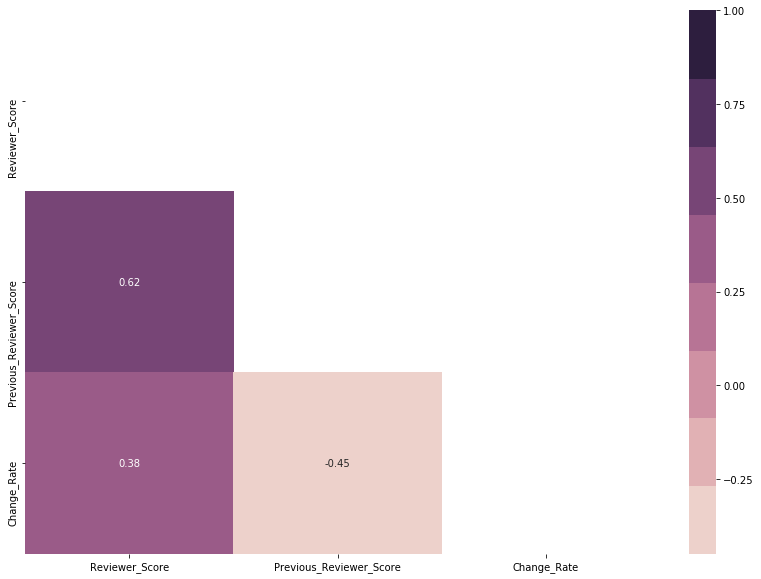

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

corr = C.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# function will detect and neglect the categorical features
sns.heatmap(C.corr(), cmap = sns.cubehelix_palette(8), annot = True, mask = mask) 


In [49]:
B[:5]

Previous_Reviewer_Score
Hotel_Name         Review_Date                         
11 Cadogan Gardens 2015Q3                           NaN
                   2015Q4                      8.287500
                   2016Q1                      7.888235
                   2016Q2                      7.871429
                   2016Q3                      9.150000

In [62]:
# implement box-cox transformation
from scipy import stats
tran_score, _ = stats.boxcox(dataset.Reviewer_Score)

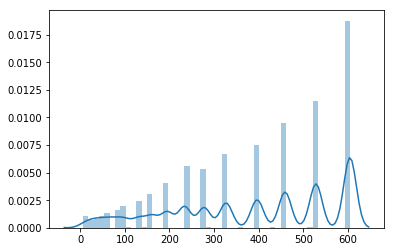

In [63]:
sns.distplot(tran_score, label = "transformed score")